# Content
1. [Data Types](#data_types)
2. [Mean, Median, Mode](#mean_median_mode)
3. [Standart Deviation](#standart_deviation)
4. [Variance](#variance)
5. [Percentiles](#percentiles)
6. [Histogram](#histogram)
7. [Normal Data Distribution](#normal_data_distribution)
8. [Scatter Plot](#scatter_plot)
9. [Regression](#regression)
10. [Linear Regression](#linear_regression)
    1. [R-Squared for Linear Regression](#r_squared_for_linear_regression)
    2. [Predict Future Values for Linear Regression](#predict_future_values_for_linear_regression)
    3. [Bad Fit for Linear Regression](#bad_fit_for_linear_regression)
11. [Polynomial Regression](#polynomial_regression)
    1. [R-Squared for Polynomial Regression](#r_squared_for_polynomial_regression)
    2. [Predict Future Values for Polynomial Regression](#predict_future_values_for_polynomial_regression)
    3. [Bad Fit for Polynomial Regression](#bad_fit_for_polynomial_regression)
12. [Multiple Regression](#multiple_regression)
    1. [Coefficient of Multiple Regression](#coefficient_of_multiple_regression)
13. [Scale Features](#scale_features)
    1. [Scale data by using Standardization](#scale_data_by_using_standardization)
    2. [Predict Values in unscalled data](#predict_values_in_unscalled_data)
14. [Train/Test](#train_test)
15. [Decision Tree](#decision_tree)

# Data Types <a id = "data_types"></a>
1. **Numerical** - numbers, and can be split into two numerical categories: 
    1. **Discrete Data** - numbers that are limited to integers. Example: The number of cars passing by. 
    2. **Continuous Data** - numbers that are of infinite value. Example: The price of an item, or the size of an item.

2. **Categorical** - values that cannot be measured up against each other. Example: a color value, or any yes/no values.

3. **Ordinal** - like categorical data, but can be measured up against each other. Example: school grades where A is better than B and so on.

# Mean, Median and Mode <a id = "mean_median_mode"></a>
1. **Mean** - the average value.To calculate the mean, find the sum of all values, and dived the sum by the number of values. 

$m = \frac{Sum}{Count}$, m - mean

2. **Median** - the mid point value. The median value is the value in the middle, after you have sorted all the values. If there are two numbers in the middle, divide the sum of those numbers by two.

$median(a) = \frac{a{\big \lfloor{(\#a + 1) / 2}\big \rfloor} + a{\big \lceil{(\#a + 1) / 2}\big \rceil}}{2}$

3. **Mode** - the most common value.

In [16]:
speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]

# Mean
mean = sum(speed) / len(speed)
print('Mean by formula - {}'.format(mean))

import numpy
mean = numpy.mean(speed)
print('Mean by numpy - {}'.format(mean))

# Median
median = (
    sorted(speed)[int(len(speed) / 2)] 
    if len(speed) % 2 == 1 
    else (
        sorted(speed)[int(len(speed) / 2)] 
        + sorted(speed)[int(len(speed) / 2) - 1]
    ) / 2
)
print('Median by formula - {}'.format(median))

median = numpy.median(speed)
print('Median by numpy - {}'.format(median))

# Mode
items_count = list(map(lambda x: speed.count(x), speed))
mode = {
    'item': speed[items_count.index(max(items_count))],
    'count': max(items_count),
}
print('Mode by formula - {}'.format(mode))

from scipy import stats
mode = stats.mode(speed)
print('Mode by scipy - {}'.format(mode)) 

Mean by formula - 89.76923076923077
Mean by numpy - 89.76923076923077
Median by formula - 87
Median by numpy - 87.0
Mode by formula - {'item': 86, 'count': 3}
Mode by scipy - ModeResult(mode=array([86]), count=array([3]))


# Standart Deviation <a id = "standart_deviation"></a>
**Standart Deviation ($\sigma$)** - number that describes how spread out the values are. A low standard deviation means that most of the numbers are close to the mean (average) value. A high standard deviation means that the values are spread out over a wider range.

$\sigma = \sqrt{\frac{\sum(x_i - \mu)^2}{N}}$

$\sigma$ - standard deviation;
$N$ - the size of the values;
$x_i$ - each value;
$\mu$ - mean;

In [17]:
speed = [32,111,138,28,59,77,97]

from functools import reduce
mean = sum(speed) / len(speed)
std = (reduce(lambda prev, item: prev + (item - mean) ** 2, [0, *speed]) 
       / len(speed)) ** 0.5
print('std by formula: {}'.format(std))

import numpy
std = numpy.std(speed)
print('std by numpy: {}'.format(std))

std by formula: 37.84501153334721
std by numpy: 37.84501153334721


# Variance <a id = "variance"></a>
**Variance ($\sigma^2$)** - indicates how spread out the values are. The average of the **squared** differences from the Mean. 


In [18]:
from numpy import var 
speed = [32,111,138,28,59,77,97]
v = numpy.var(speed)
print('variance by numpy: {}'.format(v))

variance by numpy: 1432.2448979591834


# Percentiles <a id = "percentiles"></a>
**Percentiles** are used in statistics to give you a number that describes the value that a given percent of the values are lower than.
$Percentile(p) = \frac{L[\lceil{\frac{p}{100} * N}\rceil]}{N} * 100$,

$p$ - percent; $L$ - list; $N$ - length of list 

In [19]:
ages = [5,31,43,48,50,41,7,11,15,39,80,82,32,2,8,6,25,36,27,31]
from numpy import percentile
p = percentile(ages, 90)
print('Percentile by numpy: {}'.format(p))

Percentile by numpy: 53.00000000000004


# Histogram <a id = "histogram"></a>
We use the array from the example above to draw a histogram with 5 bars.

The first bar represents how many values in the array are between 0 and 1.

The second bar represents how many values are between 1 and 2.

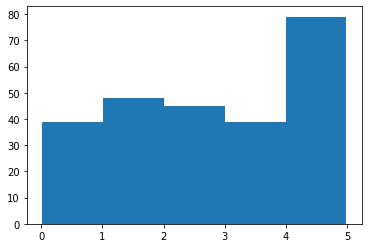

In [20]:
import numpy
import matplotlib.pyplot as plt 
x = numpy.random.uniform(0.0, 5.0, 250)
plt.hist(x, 5)
plt.show()

# Normal Data Distribution <a id = "normal_data_distribution"></a>
In probability theory this kind of data distribution is known as the **normal data distribution**, or the **Gaussian data distribution**. This is an array where the values are concentrated around a given value.

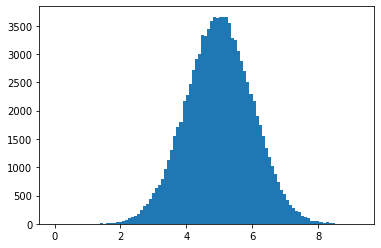

In [21]:
import numpy
import matplotlib.pyplot as plt
x = numpy.random.normal(5.0, 1.0, 100000)
plt.hist(x, 100)
plt.show() 

# Scatter Plot <a id = "scatter_plot"></a>
A scatter plot is a diagram where each value in the data set is represented by a dot.

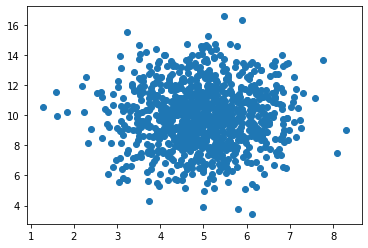

In [22]:
import matplotlib.pyplot as plt

x = numpy.random.normal(5.0, 1.0, 1000)
y = numpy.random.normal(10.0, 2.0, 1000)

plt.scatter(x, y)
plt.show()

# Regression <a id = "regression"></a>
The term regression is used when you try to find the relationship between variables.

In Machine Learning, and in statistical modeling, that relationship is used to predict the outcome of future events.

# Linear Regression <a id = "linear_regression"></a>

Linear regression uses the relationship between the data-points to draw a straight line through all them.

This line can be used to predict future values.


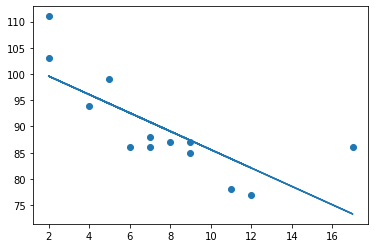

In [23]:
import matplotlib.pyplot as plt
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show() 

## R-Squared for Linear Regression <a id = "r_squared_for_linear_regression"></a>
The **r-squared** value ranges from 0 to 1, where 0 means no relationship, and 1 means 100% related.

In [34]:
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

print('Relationship: {}'.format(r))

Relationship: -0.7585915243761551


## Predict Future Values for Linear Regression <a id = "predict_future_values_for_linear_regression"></a>

In [33]:
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

speed = myfunc(10)

print('Predicted speed for {1} years old: {0}'.format(speed, 10)) 

Predicted speed for 10 years old: 85.59308314937454


## Bad Fit for Linear Regression <a id = "bad_fit_for_linear_regression"></a>
Example where inear regression would not be the best method to predict future values.

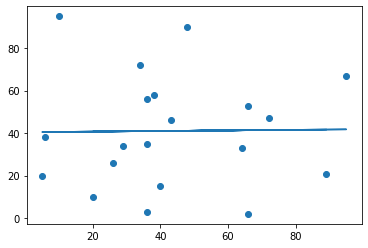

Relationship: 0.013318141542974908


In [31]:
import matplotlib.pyplot as plt
from scipy import stats

x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()
print('Relationship: {}'.format(r))

# Polynomial Regression <a id = "polynomial_regression"></a>

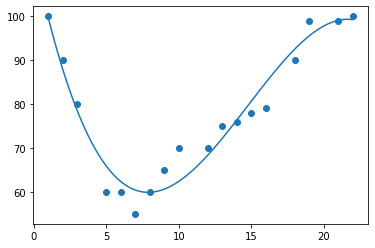

In [26]:
import numpy
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show() 

## R-Squared for Polynomial Regression <a id = "r_squared_for_polynomial_regression"></a>
It is important to know how well the relationship between the values of the x- and y-axis is, if there are no relationship the polynomial regression can not be used to predict anything.

The relationship is measured with a value called the r-squared.

The r-squared value ranges from 0 to 1, where 0 means no relationship, and 1 means 100% related.

Note: The result 0.94 shows that there is a very good relationship, and we can use polynomial regression in future predictions.


In [36]:
import numpy
from sklearn.metrics import r2_score

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

print('Relationship: {}'.format(r2_score(y, mymodel(x)))) 

Relationship: 0.9432150416451026


## Predict Future Values for Polynomial Regression <a id = "predict_future_values_for_polynomial_regression"></a>

In [35]:
import numpy
from sklearn.metrics import r2_score

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

speed = mymodel(17)
print('Predicted speed for {1} years old: {0}'.format(speed, 17)) 

Predicted speed for 17 years old: 88.87331269697998


## Bad Fit for Polynomial Regression <a id = "bad_fit_for_polynomial_regression"></a>
The result: 0.00995 indicates a very bad relationship, and tells us that this data set is not suitable for polynomial regression.

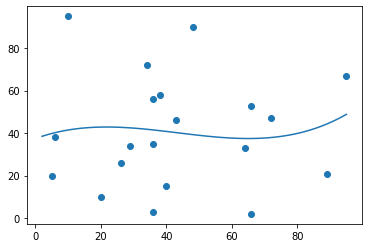

Relationship: 0.009952707566680652


In [38]:
import numpy
import matplotlib.pyplot as plt

x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(2, 95, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show() 
print('Relationship: {}'.format(r2_score(y, mymodel(x))))

# Multiple Regression<a id = "multiple_regression"></a>
**Multiple regression** is like linear regression, but with more than one independent value, meaning that we try to predict a value based on two or more variables.

It is common to name the list of independent values with a upper case X, and the list of dependent values with a lower case y.

In [72]:
from pandas import read_csv
csv_table = pandas.read_csv("cars.csv")
print(csv_table[:10])

          Car       Model  Volume  Weight  CO2
0       oyota        Aygo    1000     790   99
1  Mitsubishi  Space Star    1200    1160   95
2       Skoda      Citigo    1000     929   95
3        Fiat         500     900     865   90
4        Mini      Cooper    1500    1140  105
5          VW         Up!    1000     929  105
6       Skoda       Fabia    1400    1109   90
7    Mercedes     A-Class    1500    1365   92
8        Ford      Fiesta    1500    1112   98
9        Audi          A1    1600    1150   99


In [43]:
import pandas
from sklearn import linear_model

df = pandas.read_csv("cars.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)

#predict the CO2 emission of a car where the weight is 2300g, and the volume is 1300ccm:
predictedCO2 = regr.predict([[2300, 1300]])

print('Predicted CO2: {}'.format(*predictedCO2)) 

Predicted CO2: 107.20873279892223


## Coefficient of Multiple Regression<a id = "coefficient_of_multiple_regression"></a>

The coefficient is a factor that describes the relationship with an unknown variable.

Example: if x is a variable, then 2x is x two times. x is the unknown variable, and the number 2 is the coefficient.

In this case, we can ask for the coefficient value of weight against CO2, and for volume against CO2. The answer(s) we get tells us what would happen if we increase, or decrease, one of the independent values.

In [49]:
import pandas
from sklearn import linear_model

df = pandas.read_csv("cars.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Weight: {0:.2}, Volume: {1:.2}'.format(*regr.coef_)) 

Weight: 0.0076, Volume: 0.0078


The result array represents the coefficient values of weight and value.

Weight: 0.00755095
Volume: 0.00780526

These values tells us that if the weight increases by 1g, the CO2 emission increases by 0.00755095g.

And if the engine size (Volume) increases by 1 ccm, the CO2 emission increases by 0.00780526 g.

# Scale Features<a id = "scale_features"></a>
When your data has different values, and even different measurement units, it can be difficult to compare them. The answer to this problem is scaling. We can scale data into new values that are easier to compare.

It can be difficult to compare the volume 1.0 with the weight 790, but if we scale them both into comparable values, we can easily see how much one value is compared to the other.

## Scale data by using Standardization<a id = "scale_data_by_using_standardization"></a>
$z = (x - u) / s$

$z$ - new value; $x$ - original value; $u$ - mean; $s$ - standart deviation

In [54]:
import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

df = pandas.read_csv("cars_unscalled.csv")

X = df[['Weight', 'Volume']]

scaledX = scale.fit_transform(X)

print(scaledX[:10]) 

[[-2.10389253 -1.59336644]
 [-0.55407235 -1.07190106]
 [-1.52166278 -1.59336644]
 [-1.78973979 -1.85409913]
 [-0.63784641 -0.28970299]
 [-1.52166278 -1.59336644]
 [-0.76769621 -0.55043568]
 [ 0.3046118  -0.28970299]
 [-0.7551301  -0.28970299]
 [-0.59595938 -0.0289703 ]]


## Predict Values in unscalled data<a id = "predict_values_in_unscalled_data"></a>

In [58]:
import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

df = pandas.read_csv("cars_unscalled.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

scaledX = scale.fit_transform(X)

regr = linear_model.LinearRegression()
regr.fit(scaledX, y)

scaled = scale.transform([[2300, 1.3]])

predictedCO2 = regr.predict([scaled[0]])
print('Predicted value: {}'.format(*predictedCO2)) 

Predicted value: 107.20873279892223


# Train/Test<a id = "train_test"></a>
In Machine Learning we create models to predict the outcome of certain events. To measure if the model is good enough, we can use a method called **Train/Test**.

Train/Test is a method to measure the accuracy of your model.

It is called Train/Test because you split the the data set into two sets: a training set and a testing set. 80% for training, and 20% for testing. Train the model means create the model. Test the model means test the accuracy of the model.

The result 0.799 shows that there is a OK relationship.
The result 0.809 shows that the model fits the testing set as well, and we are confident that we can use the model to predict future values.

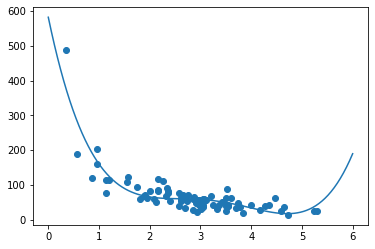

R-squared for train: 0.7988645544629798
R-squared for test: 0.8086921460343579
Predicted value: 22.879625918115835


In [68]:
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

myline = numpy.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show() 

r2 = r2_score(train_y, mymodel(train_x))
print('R-squared for train: {}'.format(r2))

r2 = r2_score(test_y, mymodel(test_x))
print('R-squared for test: {}'.format(r2)) 

print('Predicted value: {}'.format(mymodel(5))) 

# Decision Tree<a id = "decision_tree"></a>
A Decision Tree is a Flow Chart, and can help you make decisions based on previous experience.

In [70]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

df = pandas.read_csv("shows.csv")

print(df) 

    Age  Experience  Rank Nationality   Go
0    36          10     9          UK   NO
1    42          12     4         USA   NO
2    23           4     6           N   NO
3    52           4     4         USA   NO
4    43          21     8         USA  YES
5    44          14     5          UK   NO
6    66           3     7           N  YES
7    35          14     9          UK  YES
8    52          13     7           N  YES
9    35           5     9           N  YES
10   24           3     5         USA   NO
11   18           3     7          UK  YES
12   45           9     9          UK  YES


To make a decision tree, all data has to be numerical.

We have to convert the non numerical columns 'Nationality' and 'Go' into numerical values.

Pandas has a map() method that takes a dictionary with information on how to convert the values.

{'UK': 0, 'USA': 1, 'N': 2}

Means convert the values 'UK' to 0, 'USA' to 1, and 'N' to 2.

In [75]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

df = pandas.read_csv("shows.csv")

d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

print(df) 

    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            1   0
2    23           4     6            2   0
3    52           4     4            1   0
4    43          21     8            1   1
5    44          14     5            0   0
6    66           3     7            2   1
7    35          14     9            0   1
8    52          13     7            2   1
9    35           5     9            2   1
10   24           3     5            1   0
11   18           3     7            0   1
12   45           9     9            0   1


Then we have to separate the feature columns from the target column.

The feature columns are the columns that we try to predict from, and the target column is the column with the values we try to predict.

In [79]:
features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

print('X:\n{}\n\ny:\n{}'.format(X, y))

X:
    Age  Experience  Rank  Nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            2
3    52           4     4            1
4    43          21     8            1
5    44          14     5            0
6    66           3     7            2
7    35          14     9            0
8    52          13     7            2
9    35           5     9            2
10   24           3     5            1
11   18           3     7            0
12   45           9     9            0

y:
0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64


Now we can create the actual decision tree, fit it with our details, and save a .png file on the computer:

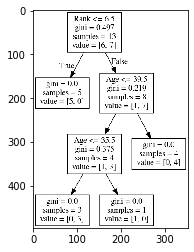

In [92]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img = pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img) 

plt.show() 